In [320]:
# prompt: mount drive contents
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [321]:
%cd "drive/MyDrive/Dirisa 2024 Challenge 2 "

[Errno 2] No such file or directory: 'drive/MyDrive/Dirisa 2024 Challenge 2 '
/content/drive/MyDrive/Dirisa 2024 Challenge 2 


# **Import of Libraries**

In [322]:
# Data manipulation and preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Feature selection
from sklearn.feature_selection import mutual_info_classif

# Model building and training
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.metrics import classification_report, roc_auc_score

# Model validation
from sklearn.model_selection import train_test_split, StratifiedKFold

# Visualization
import plotly.express as px
import plotly.graph_objects as go

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings (optional)


# **Loading data**

In [323]:
df=pd.read_csv("Disease_Symptoms_Dataset.csv")
df

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,...,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite,night sweats,back pain in certain parts,weight loss,disease
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,...,1,0,0,1,0,1,NaN,NaN,NaN,TB
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,...,0,0,0,1,1,1,NaN,NaN,NaN,TB
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,...,0,0,1,1,1,1,NaN,NaN,NaN,TB
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,...,1,1,0,1,0,1,NaN,NaN,NaN,TB
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,...,1,1,1,1,0,0,NaN,NaN,NaN,TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,996,8502616307,Dimitri,Female,5/24/2020,12:39 PM,0,0,1,0,...,0,0,0,1,1,1,0.0,0.0,0.0,Covid-19
2996,997,3468480814,Averill,Male,1/12/2020,6:47 PM,0,0,1,1,...,0,0,1,1,0,1,0.0,0.0,0.0,Covid-19
2997,998,1317594584,Hi,Female,12/2/2020,7:59 PM,0,0,1,0,...,1,1,0,0,0,1,0.0,0.0,1.0,Covid-19
2998,999,4933185840,Vivienne,Female,11/11/2020,1:25 PM,0,0,0,1,...,0,0,1,0,0,1,0.0,0.0,0.0,Covid-19


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   no                                                         3000 non-null   int64  
 1   id                                                         3000 non-null   int64  
 2   name                                                       3000 non-null   object 
 3   gender                                                     3000 non-null   object 
 4   date                                                       3000 non-null   object 
 5   time                                                       3000 non-null   object 
 6   fever for two weeks                                        3000 non-null   int64  
 7   coughing blood                                             3000 non-null   int64  
 8   sputum m

Looking at the data above the data has columns which are irrelevent and might also cause noise(date,time,no,id) in the data and also some columns which cause data privacy issues like the "names" columns

In [325]:
#dropping the columns which are irrrelevent and might cause noise
df.drop(columns=["no", "id", "name", "date", "time"], inplace=True, errors='ignore')
df.head()

,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite,night sweats,back pain in certain parts,weight loss,disease
0,Male,0,1,1,1,1,1,1,1,0,0,1,0,1,NaN,NaN,NaN,TB
1,Male,1,1,1,0,0,1,1,0,0,0,1,1,1,NaN,NaN,NaN,TB
2,Male,0,0,1,1,0,1,0,0,0,1,1,1,1,NaN,NaN,NaN,TB
3,Female,0,1,0,1,1,0,0,1,1,0,1,0,1,NaN,NaN,NaN,TB
4,Female,0,1,0,1,1,1,0,1,1,1,1,0,0,NaN,NaN,NaN,TB


In [326]:
df.columns

Index(['gender', 'fever for two weeks', 'coughing blood',
       'sputum mixed with blood', 'night sweats ', 'chest pain',
       'back pain in certain parts ', 'shortness of breath', 'weight loss ',
       'body feels tired', 'lumps that appear around the armpits and neck',
       'cough and phlegm continuously for two weeks to four weeks',
       'swollen lymph nodes', 'loss of appetite', 'night sweats',
       'back pain in certain parts', 'weight loss', 'disease'],
      dtype='object')

In [327]:
# check which columns have missing values and how many are missing (propotion)
df.isnull().sum()

,0
gender,0
fever for two weeks,0
coughing blood,0
sputum mixed with blood,0
night sweats,0
chest pain,0
back pain in certain parts,0
shortness of breath,0
weight loss,0
body feels tired,0


From the above output we can safely say that the columns have more than 30% of their data missing but also recognized that these columns not only have missing data but are repeated columns, which means we can drop them, out of our data since they are causing redundancy

In [328]:
# Remove duplicated columns, keeping the first occurrence
df.drop(df.columns[14:17], axis=1, inplace=True)
df.sample(10)

,gender,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite,disease
2045,Male,0,0,0,0,0,0,0,0,0,0,0,1,0,Covid-19
445,Male,0,0,1,1,1,1,0,1,1,0,0,1,0,TB
720,Female,0,0,0,0,0,1,0,0,0,0,0,1,1,TB
1799,Female,1,0,0,0,1,1,0,1,0,1,0,0,1,HIV
2922,Female,0,0,1,1,0,1,0,0,0,0,0,0,0,Covid-19
2879,Female,0,0,0,1,1,0,0,0,0,0,1,1,1,Covid-19
126,Male,1,0,0,0,0,0,1,1,1,1,1,1,0,TB
1491,Female,0,0,0,0,1,0,0,1,0,1,0,1,0,HIV
108,Female,0,0,1,1,1,1,1,0,0,1,1,0,0,TB
329,Male,0,0,0,1,1,1,1,1,0,1,1,0,1,TB


Above is the dataset with dropped duplicate columns


In [329]:
df["disease"].value_counts()

,count
disease,
TB,1000
HIV,1000
Covid-19,1000


So as seen above there is equal distribution of the detected diseases from the data

In [330]:
df["disease"].unique()

array(['TB', 'HIV', 'Covid-19'], dtype=object)

In [331]:
tb_cases= df[df['disease'] == 'TB']
hiv_cases = df[df['disease'] == 'HIV']
covid_cases = df[df['disease'] == 'Covid-19']

# Reduce TB cases by 50%
hiv_cases = hiv_cases.sample(frac=0.37, random_state=42)
covid_cases = covid_cases.sample(frac=0.37, random_state=42)

# Combine reduced TB cases with other diseases
updated_df = pd.concat([tb_cases, hiv_cases, covid_cases])

# Reset index for cleaner output
updated_df.reset_index(drop=True, inplace=True)
df=updated_df
df["disease"].value_counts()

,count
disease,
TB,1000
HIV,370
Covid-19,370


Then random under sampling was used taking 37% of each disease besides TB, this is because this is going to be a binary classisfication, so to avoid class imbalance, this undersampling techniques taking data at random,

various random sampling techniques were utilized for oversampling(SMOTE AND ADASYN) but they could not produce data points because the dataset is too small for them to produce sythetic valid data points for the TB, because HIV & COVID are combined is causes class imbalance TB being the minority class

In [332]:
import plotly.express as px

# Calculate value counts for the "Disease" column in `df_adjusted`
disease_counts = df["disease"].value_counts().reset_index()
disease_counts.columns = ["disease", "Count"]

# Create a ring (donut) plot using Plotly
fig = px.pie(
    disease_counts,
    names="disease",
    values="Count",
    title="Distribution of Diseases",
    hole=0.4  # To create the donut effect
)

# Display the chart
fig.show()


as seen now in the visual TB now constributes 57.5% to the data, and the on two disease(HIV AND Covid-19) combined make up the rest of the data signifying a rather close class balance with only a difference of approximately 2%

In [333]:
df.isna().sum()

,0
gender,0
fever for two weeks,0
coughing blood,0
sputum mixed with blood,0
night sweats,0
chest pain,0
back pain in certain parts,0
shortness of breath,0
weight loss,0
body feels tired,0


# **Feature Selection**

In [334]:
# Split features and target
X = df.drop(columns=["disease"])
y = df["disease"]

encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = encoder.fit_transform(X[col])

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame for scores
mi_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi_scores})

# Sort by importance
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Create a bar plot
fig = px.bar(
    mi_df,
    x="Feature",
    y="Mutual Information",
    title="Feature Importance using Mutual Information",
    text="Mutual Information",
    width=1100,
    template="plotly_white",
)

# Add formatting
fig.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig.update_layout(xaxis_title="Features", yaxis_title="Mutual Information Score")

# Show plot
fig.show()

The analysis of feature importance using mutual information reveals distinct patterns in the relevance of features for predicting the target variable. Features such as shortness of breath, loss of appetite, sputum mixed with blood, and fever for two weeks exhibit strong relationships with the target, indicating their high predictive value. These features provide critical insights and should be prioritized in predictive modeling efforts. A group of features, including coughing blood, chest pain, and lumps appearing around the armpits and neck, also demonstrate a moderate level of importance, suggesting they contribute meaningful, though slightly less significant, information about the target.

On the other hand, several features, including back pain in certain parts, gender, weight loss, and night sweats, show no measurable mutual information with the target, indicating they are not predictive and may introduce unnecessary noise to the model. Excluding such features could streamline the dataset and enhance model performance by focusing only on the most relevant variables. This distinction underscores the value of mutual information as a tool for identifying and prioritizing features based on their predictive relevance.

In [335]:
# Filter features with non-zero mutual information
important_features = mi_df[mi_df["Mutual Information"] > 0]["Feature"]

# Drop columns with zero importance from the dataset
X_filtered = X[important_features]

# Display the filtered dataset
X_filtered.head()


,shortness of breath,loss of appetite,sputum mixed with blood,fever for two weeks,cough and phlegm continuously for two weeks to four weeks,coughing blood,lumps that appear around the armpits and neck,chest pain,body feels tired,swollen lymph nodes,back pain in certain parts,gender,weight loss,night sweats
0,1,1,1,0,1,1,0,1,0,0,1,1,1,1
1,1,1,1,1,1,1,0,0,0,1,1,1,0,0
2,0,1,1,0,1,0,1,0,0,1,1,1,0,1
3,0,1,0,0,1,1,0,1,1,0,0,0,1,1
4,0,0,0,0,1,1,1,1,1,0,1,0,1,1


Now from above the columns with importance scores greater than 0 are then filtered sine they show meaningful contribution to the detection of TB

In [336]:
# Combine the filtered features and the target variable
combined_data = X_filtered.copy()
combined_data['Disease'] = y  # Assuming 'Disease' is your target variable

# Display the first few rows of the combined dataset
combined_data.head()

,shortness of breath,loss of appetite,sputum mixed with blood,fever for two weeks,cough and phlegm continuously for two weeks to four weeks,coughing blood,lumps that appear around the armpits and neck,chest pain,body feels tired,swollen lymph nodes,back pain in certain parts,gender,weight loss,night sweats,Disease
0,1,1,1,0,1,1,0,1,0,0,1,1,1,1,TB
1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,TB
2,0,1,1,0,1,0,1,0,0,1,1,1,0,1,TB
3,0,1,0,0,1,1,0,1,1,0,0,0,1,1,TB
4,0,0,0,0,1,1,1,1,1,0,1,0,1,1,TB


**Convert the target variable to binary, to detect cases of TB and not TB**

with TB assinged to 1 and 0 for the other two diseases

In [337]:

# Combine the filtered features and the target variable
combined_data = X_filtered.copy()
combined_data['disease'] = y

# Apply the transformation to 'combined_data' or a relevant DataFrame
combined_data = combined_data.applymap(lambda x: 1 if x == 'TB' else 0)

# Display the value counts of the target variable 'disease'
disease_counts = combined_data['disease'].value_counts()

# Convert the counts to a DataFrame for Plotly
disease_counts_df = disease_counts.reset_index()
disease_counts_df.columns = ['disease', 'count']

# Enhanced bar chart using Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=disease_counts_df['disease'],
    y=disease_counts_df['count'],
    marker=dict(color=['#636EFA', '#EF553B'], line=dict(color='black', width=1)),
    text=disease_counts_df['count'],
    textposition='auto'
))

# Update layout for better aesthetics
fig.update_layout(
    title="Distribution of Disease Cases",
    xaxis_title="Disease (0 = Non-TB, 1 = TB)",
    yaxis_title="Count",
    plot_bgcolor="rgba(240,240,240,1)",
    paper_bgcolor="rgba(255,255,255,1)",
    font=dict(size=14),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True),
)

fig.show()


The visual above shows to us after the distribution of diseases  after they have been converted to binary variables

# **Split data into train and test**

In [338]:
# Combine the filtered features and the target variable
combined_data = X_filtered.copy()
combined_data['disease'] = y

# Apply the transformation to 'combined_data' or a relevant DataFrame
combined_data['disease'] = combined_data['disease'].apply(lambda x: 1 if x == 'TB' else 0)

# Split data into features (X) and target (y)
X = combined_data.drop(columns=['disease'])  # Features
X.columns = X.columns.str.replace(' ', '_')
y = combined_data['disease']                # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")



Training Features Shape: (1392, 14)
Testing Features Shape: (348, 14)
Training Target Shape: (1392,)
Testing Target Shape: (348,)


In [339]:
combined_data.disease.unique()

array([1, 0])

# **Remove spaces and put dashes**

This is done because the models(light gradient booster is showing warnings that some of the columns have spaces and they hinder its learning/training)

In [340]:
X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# **Training and testing of Models**

Models considered for this prediction is extreme gardient booster,naive bayes,balanced random forest,light gradient booster all because of their ability to learn and generalize with a small data set and most importantly because of their nature being capable of doing binary classification


In [341]:
# Suppress warnings (optional)
warnings.filterwarnings('ignore')

# Train and evaluate multiple models
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Define the models
    models = {
        "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "LightGBM": LGBMClassifier(random_state=42),
        "Naive Bayes": GaussianNB()
    }

    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate the model
        report = classification_report(y_test, y_pred, output_dict=True)

        # Calculate ROC-AUC if probabilities are available
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        else:
            roc_auc = None  # Some models might not support predict_proba

        # Add ROC-AUC to the results
        report["roc_auc"] = roc_auc
        results[name] = report

    return results

# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

# Convert results to a DataFrame
evaluation_results = pd.DataFrame({
    model: {
        "Precision": round(metrics["weighted avg"]["precision"], 3),
        "Recall": round(metrics["weighted avg"]["recall"], 3),
        "F1-Score": round(metrics["weighted avg"]["f1-score"], 3),
        "Accuracy": round(metrics["accuracy"], 3),
        "ROC-AUC": round(metrics["roc_auc"], 3) if metrics["roc_auc"] is not None else None
    }
    for model, metrics in results.items()
})

# Display the DataFrame
print(evaluation_results)


           Balanced Random Forest  XGBoost  LightGBM  Naive Bayes
Precision                   0.709    0.702     0.707        0.749
Recall                      0.695    0.701     0.704        0.750
F1-Score                    0.699    0.702     0.705        0.749
Accuracy                    0.695    0.701     0.704        0.750
ROC-AUC                     0.767    0.744     0.766        0.789


The results indicate that Naive Bayes is the best-performing model among the evaluated options when considering the two critical metrics: **ROC-AUC** and **Recall**. The Naive Bayes model achieved the highest ROC-AUC score of **78.9%**, demonstrating its superior ability to distinguish between the positive and negative classes. Furthermore, it attained the highest Recall of **75%**, indicating its effectiveness in correctly predicting positive cases, which is essential in scenarios where identifying true positives is of utmost importance.

While other models, such as Balanced Random Forest, XGBoost, and LightGBM, showed competitive results, none surpassed Naive Bayes in both ROC-AUC and Recall. Notably, the Balanced Random Forest achieved a comparable ROC-AUC score of **76.7%**, but its Recall was lower at **69.5%**. Similarly, LightGBM performed well with a ROC-AUC of **76.6%** but fell short with a Recall of **70.4%**.

The consistent performance of Naive Bayes across these essential metrics highlights its reliability and suitability for this task. Moving forward, applying **stratified cross-validation** provided an opportunity to refine these models further, ensuring that the performance results are robust and generalizable across different subsets of the data.

# **Cross Validation**

In [342]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Define a function to perform stratified cross-validation
def stratified_cross_validation(X, y, models, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {model_name: [] for model_name in models.keys()}

    # Iterate through the splits
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)
            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            # Evaluate the model
            report = classification_report(y_test, y_pred, output_dict=True)
            roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

            # Store the weighted average metrics
            results[model_name].append({
                "Precision": report["weighted avg"]["precision"],
                "Recall": report["weighted avg"]["recall"],
                "F1-Score": report["weighted avg"]["f1-score"],
                "Accuracy": report["accuracy"],
                "ROC-AUC": roc_auc
            })

    # Calculate average metrics for each model
    summary_results = {}
    for model_name, metrics in results.items():
        metrics_df = pd.DataFrame(metrics)
        summary_results[model_name] = metrics_df.mean().round(3)

    return pd.DataFrame(summary_results).T

# Define models, including Balanced Random Forest
models = {
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, force_row_wise=True, verbose=-1),
    "Naive Bayes": GaussianNB()
}

# Perform stratified cross-validation
stratified_results = stratified_cross_validation(X, y, models, n_splits=5)

# Display the results
print(stratified_results)


                        Precision  Recall  F1-Score  Accuracy  ROC-AUC
Balanced Random Forest      0.731   0.728     0.728     0.728    0.790
XGBoost                     0.706   0.707     0.706     0.707    0.763
LightGBM                    0.730   0.730     0.730     0.730    0.791
Naive Bayes                 0.752   0.752     0.750     0.752    0.817


The cross-validation results further solidify the performance of **Naive Bayes** as the best-performing model across the key metrics. After applying stratified cross-validation:

- **Naive Bayes** achieved a **ROC-AUC** of **81.7%**, the highest among all models, showcasing its superior ability to distinguish between classes. It also had the highest **Recall** of **75.2%**, reinforcing its capability to accurately identify positive cases.
- The **Balanced Random Forest** showed improvement, with a **ROC-AUC** of **79.0%** and a **Recall** of **72.8%**, but it still lagged behind Naive Bayes.
- **LightGBM** demonstrated comparable results to the Balanced Random Forest, with a **ROC-AUC** of **79.1%** and a **Recall** of **73.0%**, but it fell short of Naive Bayes in overall performance.
- **XGBoost** had the lowest performance among the models, with a **ROC-AUC** of **76.3%** and a **Recall** of **70.7%**.

In conclusion, Naive Bayes consistently outperformed the other models across all critical metrics after stratified cross-validation. Its high **ROC-AUC** and **Recall** make it the most reliable choice for this task, particularly when distinguishing between classes and identifying positive cases are the primary objectives.

# **Visual Comparison between normal training and Cross Validation**

In [343]:
comparison_df = pd.concat(
    [stratified_results, evaluation_results],
    axis=1,
    keys=["Stratified CV", "Evaluation"]
)

# Flatten the multi-level column index for easier reference
comparison_df.columns = [f"{metric}_{source}" for source, metric in comparison_df.columns]

In [344]:
import plotly.graph_objects as go

# Generate bar plots for each metric using Plotly
metrics = ["Precision", "Recall", "F1-Score", "Accuracy", "ROC-AUC"]
figures = []

for metric in metrics:
    stratified_col = f"{metric}_Stratified CV"
    evaluation_col = f"{metric}_Evaluation"

    if stratified_col in comparison_df.columns and evaluation_col in comparison_df.columns:
        fig = go.Figure()
        fig.add_trace(go.Bar(
            x=comparison_df.index,
            y=comparison_df[stratified_col],
            name="Stratified CV",
            marker_color="blue"
        ))
        fig.add_trace(go.Bar(
            x=comparison_df.index,
            y=comparison_df[evaluation_col],
            name="Evaluation",
            marker_color="orange"
        ))
        fig.update_layout(
            title=f"Comparison of {metric} (Stratified CV vs Evaluation)",
            xaxis_title="Model",
            yaxis_title=metric,
            barmode="group",
            legend_title="Data Source",
            template="plotly_white"
        )
        figures.append(fig)

# Display all figures
for fig in figures:
    fig.show()


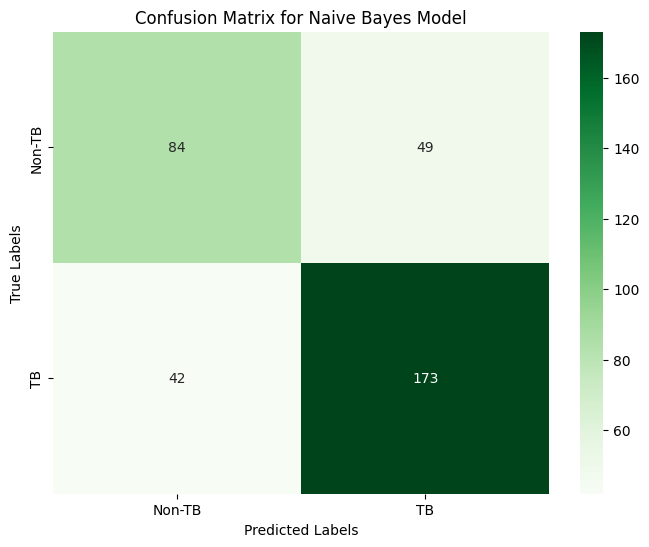

In [348]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = naive_bayes_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_labels = ["Non-TB", "TB"]

# Plot the confusion matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=cm_labels, yticklabels=cm_labels)
plt.title("Confusion Matrix for Naive Bayes Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [350]:
# Select only ROC-AUC and Recall metrics for plotting
selected_metrics = ["ROC-AUC", "Recall"]
filtered_results = stratified_results[selected_metrics]

# Create a bar plot for each metric
fig = go.Figure()

for metric in selected_metrics:
    fig.add_trace(go.Bar(
        x=filtered_results.index,
        y=filtered_results[metric],
        name=metric,
        text=filtered_results[metric],  # Add values on top
        textposition='outside'  # Position the text outside the bars
    ))

# Update the layout
fig.update_layout(
    title="Comparison of ROC-AUC and Recall (Stratified Cross-Validation)",
    xaxis_title="Model",
    yaxis_title="Metric Score",
    barmode="group",
    legend_title="Metrics",
    template="plotly_white"
)

# Show the figure
fig.show()


#**Testing the Naive bayes**

In [345]:
# Extract the positive instance for testing
positive_instance = X_test.iloc[[3]]
naive_bayes_model = models["Naive Bayes"]

# Make predictions
predicted_class = naive_bayes_model.predict(positive_instance)
predicted_probabilities = naive_bayes_model.predict_proba(positive_instance)

# Display the predicted result
if predicted_class[0] == 1:
    print("The model predicts that the patient has TB.")
else:
    print("The model predicts that the patient does not have TB.")

# Display the actual result
if y_test.iloc[3] == 1:  # Use direct indexing for the actual class
    print("The patient actually has TB.")
else:
    print("The patient actually does not have TB.")

# Display the predicted probabilities for both classes
print(f"Predicted Probabilities (Non-TB, TB): {predicted_probabilities[0]}")


The model predicts that the patient does not have TB.
The patient actually does not have TB.
Predicted Probabilities (Non-TB, TB): [0.57407024 0.42592976]


Based on the above  test we can see that the model is approximately 43% confident the patient has TB and also 57% that the patient does not have TB, so based on this the model predicted that the patient does not have TB and truely the person does not have TB

In [346]:
# Extract the positive instance for testing
positive_instance = X_test.iloc[[2]]
naive_bayes_model = models["Naive Bayes"]

# Make predictions
predicted_class = naive_bayes_model.predict(positive_instance)
predicted_probabilities = naive_bayes_model.predict_proba(positive_instance)

# Display the predicted result
if predicted_class[0] == 1:
    print("The model predicts that the patient has TB.")
else:
    print("The model predicts that the patient does not have TB.")

# Display the actual result
if y_test.iloc[2] == 1:  # Use direct indexing for the actual class
    print("The patient actually has TB.")
else:
    print("The patient actually does not have TB.")

# Display the predicted probabilities for both classes
print(f"Predicted Probabilities (Non-TB, TB): {predicted_probabilities[0]}")


The model predicts that the patient has TB.
The patient actually has TB.
Predicted Probabilities (Non-TB, TB): [0.22409623 0.77590377]


Based on the above  test we can see that the model is approximately 78% confident the patient has TB and also 22% that the patient does not have TB, so based on this the model predicted that they have TB and truely the person does have TB

but based on all this and the limitation of the availability of data has caused a challenge for the models to have enough data to train on, but they are promising with their adequate performaces, whihc in future work we plan on doing a deeper research for data or even collabarating with medical sector to acquire more of the data, with the goal of improving the models

In [347]:
import pickle

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)
print("Model saved successfully as 'naive_bayes_model.pkl'")


Model saved successfully as 'naive_bayes_model.pkl'
